In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pathlib
path = pathlib.Path('/content/gdrive/My Drive/ssafy/health_data.csv') 

df = pd.read_csv(path)
df = df.dropna(axis = 0).reset_index(drop=True)
height = torch.tensor(df.height)
weight = torch.tensor(df.weight)
x_train = height.view([height.shape[0],1]).float() 
y_train = weight.view([weight.shape[0],1]).float()
df.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


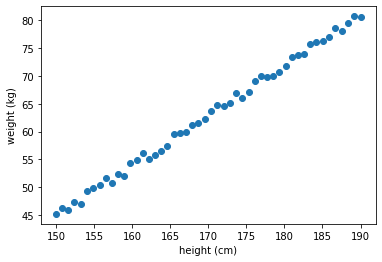

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

x = x_train
y = y_train

plt.scatter(x, y)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [13]:
# Wieght와 bias 
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Data normlization
x_min, x_max = x_train.min(), x_train.max() # x의 최대, 최솟값
y_min, y_max = y_train.min(), y_train.max() # y의 최대, 최솟값
x = (x_train-x_min)/(x_max-x_min)
y = (y_train-y_min)/(y_max-y_min)

# [Do it yourself] optimizer 설정(Parameter는 W,b이며, learnaing rate는 0.1로 시작해보고, 적당한 값을 튜닝해 보세요.)
# Hint: SGD 또는 많이 사용하는 Adam을 사용해서 optimizer를 생성해보세요
optimizer = optim.Adam([W, b], lr=0.1)

# 경사 하강법을 반복 횟수 설정
epochs = 10000

for epoch in range(epochs + 1):
    # H(x) 계산
    hypothesis = W * x + b

    # cost 계산
    cost = torch.mean((hypothesis - y) ** 2)

    # [Do it yourself] cost로 H(x) 개선을 위한 update (update 순서 : zero_grad() -> backward() -> step())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 1000번마다 로그 출력
    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/10000 W: 0.100, b: 0.100 Cost: 0.337983
Epoch 1000/10000 W: 1.013, b: -0.007 Cost: 0.000261
Epoch 2000/10000 W: 1.013, b: -0.007 Cost: 0.000261
Epoch 3000/10000 W: 1.013, b: -0.007 Cost: 0.000261
Epoch 4000/10000 W: 1.013, b: -0.007 Cost: 0.000261
Epoch 5000/10000 W: 1.013, b: -0.007 Cost: 0.000261
Epoch 6000/10000 W: 1.012, b: -0.008 Cost: 0.000263
Epoch 7000/10000 W: 1.013, b: -0.006 Cost: 0.000261
Epoch 8000/10000 W: 1.013, b: -0.007 Cost: 0.000261
Epoch 9000/10000 W: 1.013, b: -0.006 Cost: 0.000261
Epoch 10000/10000 W: 1.013, b: -0.006 Cost: 0.000261


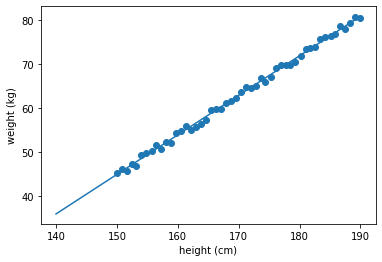

In [14]:
# 직선 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = x_train
y = y_train
plt.scatter(x, y)

t = np.arange(140.,190.,0.001)

# t를 normalize한 뒤 y값 예측
t_norm = (t-x_min.numpy())/(x_max.numpy()-x_min.numpy())
output = W.item()*t_norm+b.item()

# y를 denormalize
y_denorm = (output)*(y_max.numpy()-y_min.numpy())+y_min.numpy()

plt.plot(t, y_denorm)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
x_data = [[1, -4], [1, 2], [2, 3], [3, 1],[4, -2], [4, 3], [5, 3], [6, 2], [3, 8], [6, -2]]
y_data = [[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [17]:
#답안 작성

# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.Adam([W, b], lr=0.01)

nb_epochs = 5000
for epoch in range(nb_epochs + 1):

    # [Do it yourself] hypothesis 계산
    hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))


    # [Do it yourself] Cost 계산
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # [Do it yourself] optimizer와 cost를 이용해 모델 파라메터 W,b를 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/5000 Cost: 0.693147
Epoch  100/5000 Cost: 0.442445
Epoch  200/5000 Cost: 0.351426
Epoch  300/5000 Cost: 0.289290
Epoch  400/5000 Cost: 0.244120
Epoch  500/5000 Cost: 0.209718
Epoch  600/5000 Cost: 0.182610
Epoch  700/5000 Cost: 0.160700
Epoch  800/5000 Cost: 0.142635
Epoch  900/5000 Cost: 0.127506
Epoch 1000/5000 Cost: 0.114669
Epoch 1100/5000 Cost: 0.103659
Epoch 1200/5000 Cost: 0.094128
Epoch 1300/5000 Cost: 0.085813
Epoch 1400/5000 Cost: 0.078507
Epoch 1500/5000 Cost: 0.072048
Epoch 1600/5000 Cost: 0.066308
Epoch 1700/5000 Cost: 0.061180
Epoch 1800/5000 Cost: 0.056578
Epoch 1900/5000 Cost: 0.052433
Epoch 2000/5000 Cost: 0.048685
Epoch 2100/5000 Cost: 0.045285
Epoch 2200/5000 Cost: 0.042190
Epoch 2300/5000 Cost: 0.039366
Epoch 2400/5000 Cost: 0.036781
Epoch 2500/5000 Cost: 0.034410
Epoch 2600/5000 Cost: 0.032230
Epoch 2700/5000 Cost: 0.030221
Epoch 2800/5000 Cost: 0.028366
Epoch 2900/5000 Cost: 0.026650
Epoch 3000/5000 Cost: 0.025061
Epoch 3100/5000 Cost: 0.023585
Epoch 32

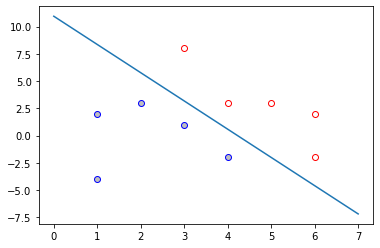

In [18]:
# Cost가 0.01 이하로 작아질 경우 학습이 잘 된것으로 볼 수 있습니다.
# classifier가 잘 학습되었는지 시각화 합니다. 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_data = [[1, -4], [1, 2], [2, 3], [3, 1],[4, -2], [4, 3], [5, 3], [6, 2], [3, 8], [6, -2]]
y_data = [[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

x = x_train
y = y_train

W_x = W[0][0].detach().numpy()
W_y = W[1][0].detach().numpy()
b = b.detach().numpy()

for i in range(len(x_data)):
  if y_data[i][0]:
    plt.scatter(x_data[i][0], x_data[i][1], color='1', edgecolor="r")
  else:
    plt.scatter(x_data[i][0], x_data[i][1], color='0.75', edgecolor="b")

t = np.arange(0.,7.,0.001)
plt.plot(t, -(W_x/W_y)*t- b/W_y)
plt.show()